<a href="https://colab.research.google.com/github/Amithashreshta/255/blob/main/255_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install folium

In [ ]:
pip install plotly

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import datetime
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly as py
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/US_Accidents_June20/US_Accidents_June20.csv')


In [ ]:
df.tail()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.0,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513616,A-3513780,Bing,NaN,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,At Highland Ave/Arden Ave - Accident.,NaN,CA-210 W,R,Highland,San Bernardino,CA,92346,US,US/Pacific,KSBD,2019-08-23 20:50:00,79.0,79.0,47.0,28.63,7.0,SW,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [ ]:
severity_x = df.Severity.unique()

In [ ]:
severity_y = df.Severity.value_counts().sort_index()

In [ ]:
fig = go.Figure(data=[go.Bar(
            x= [1,2,3,4], y=severity_y
        )])
fig.update_layout(
    title_text="Recorded Severity of Accidents")
fig.show()

In [ ]:
bool_cols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
booldf = df[bool_cols]
_boolean = booldf.sum(axis=0)

In [ ]:
_boolean

Amenity             42082
Bump                  606
Crossing           274526
Give_Way             9564
Junction           284449
No_Exit              4384
Railway             31175
Roundabout            184
Station             70321
Stop                51976
Traffic_Calming      1401
Traffic_Signal     623623
Turning_Loop            0
dtype: int64

In [ ]:
## slide
fig = px.pie( _boolean, values = _boolean, names = bool_cols ,
             title= "Proximity")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df = df.set_index('time')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 06:07:59,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:49:27,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
2016-02-08 07:23:34,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
2016-02-08 07:39:07,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
df.index

DatetimeIndex(['2016-02-08 05:46:00', '2016-02-08 06:07:59',
               '2016-02-08 06:49:27', '2016-02-08 07:23:34',
               '2016-02-08 07:39:07', '2016-02-08 07:44:26',
               '2016-02-08 07:59:35', '2016-02-08 07:59:58',
               '2016-02-08 08:00:40', '2016-02-08 08:10:04',
               ...
               '2019-08-23 17:42:27', '2019-08-23 17:40:12',
               '2019-08-23 17:40:12', '2019-08-23 17:43:56',
               '2019-08-23 18:30:23', '2019-08-23 18:03:25',
               '2019-08-23 19:11:30', '2019-08-23 19:00:21',
               '2019-08-23 19:00:21', '2019-08-23 18:52:06'],
              dtype='datetime64[ns]', name='time', length=3513617, freq=None)

In [ ]:
years = ['2016', '2017', '2018']
fig = make_subplots(rows=1, cols=3)
for i,year in enumerate(years):

  fig.add_trace(
      go.Scatter(x=df.loc[year].ID.resample('M').count().index, y=df.loc[year].ID.resample('M').count().values),
      row=1, col=i+1
  )
fig.update_layout(height=600, width=1200, title_text="Side By Side Subplots")
fig.show()


In [ ]:
df['Weekday'] = df.index.weekday
yes =df.groupby('Weekday').ID.count() 
fig = px.bar(df, x = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] , y=yes, color=yes,
             title= ' Acccidents by Weekday ', height=400)
fig.show()

In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix, fontsize=15')
    plt.show()

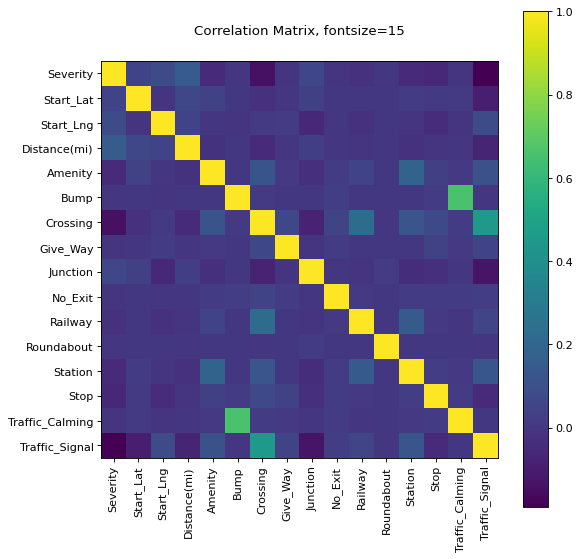

In [ ]:
plotCorrelationMatrix(df, 8)

In [ ]:
df['State'].value_counts()

CA    816825
TX    329284
FL    258002
SC    173277
NC    165958
NY    160817
PA    106787
IL     99692
VA     96075
MI     95983
GA     93614
OR     90122
MN     81863
AZ     78584
TN     69895
WA     68544
OH     66139
LA     61515
OK     60003
NJ     59059
MD     53593
UT     51685
CO     49731
AL     44625
MA     39044
IN     33746
MO     33643
CT     25901
NE     23970
KY     22553
WI     20120
RI     11753
IA     11475
NV     10643
NH      7984
KS      7939
MS      6585
DE      5739
NM      5523
DC      4820
WV      2381
ME      2243
ID      2044
AR      2012
VT       702
MT       512
WY       508
SD        61
ND        44
Name: State, dtype: int64

In [ ]:
df['State'].unique()


array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'TN', 'NC', 'KS', 'LA',
       'OK', 'CO', 'UT', 'AZ', 'MN', 'MS', 'NV', 'ME', 'AR', 'ID', 'VT',
       'NM', 'ND', 'WY', 'SD', 'MT'], dtype=object)

In [ ]:

states = ['Ohio','West Virginia', 'California', 'Florida','Georgia',' South Carolina','Nebraska','Iowa','Illinois',
          'Missouri','Wisconsin','Indiana','Michigan', 'New Jersey','New York','Connecticut','Massachusetts','Rhode Island',
          'New Hampshire','Pennsylvania','Kentucky','Maryland','Virginia','District of Columbia','Delaware',
          'Texas','Washington',  'Oregon','Alabama', 'Tennessee','North Carolina','Kansas','Louisiana','Oklahoma',
           'Colorado', 'Utah','Arizona','Minnesota','Missouri','Nevada','Maine', 'Arkansas', 'Idaho','Vermont', 'New Mexico', 
           'North Dakota', 'Wyoming','South Dakota', 'Montana']
              


Values = [66139, 2381, 816825, 258002, 93614, 173277, 23970, 11475, 99692,33643, 20120 
,33746,95983, 59059,  160817,25901,39044,11753,7984, 106787,22553, 53593,
 96075,4820,5739,329284,68544,90122, 44625, 69895,165958,7939,61515,
 60003,49731,51685,78584,81863,6585, 10643,2243, 2012,2044, 702,
5523,44,508, 61, 512 ]

In [ ]:
fig = px.choropleth(df,  # Input Pandas DataFrame
                    locations=df['State'].unique(),  # DataFrame column with locations
                    color= Values,  # DataFrame column with color values
                    hover_name= states, # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State Rankings', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  